# Step 1: Load Required Packages and Dataset

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Feature matrix
y = iris.target  # Labels

print(X.shape)

(150, 4)


In [11]:
# Step 1: Normalize the dataset (mean centering)
X_meaned = X - np.mean(X, axis=0)

In [13]:
# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_meaned, rowvar=False)

In [17]:
# Step 3: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [19]:
# Step 4: Sort eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [21]:
# Select the first two principal components
eigenvector_subset = eigenvectors[:, :2]

# Transform the data
X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()


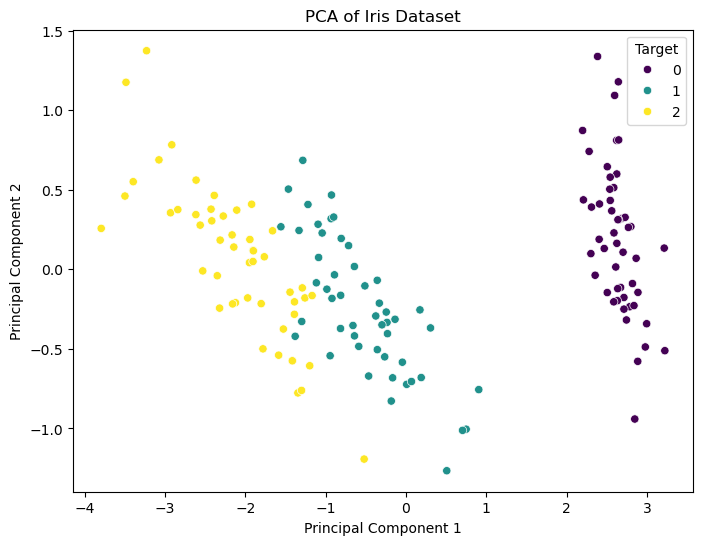

In [23]:
# Create a DataFrame with the reduced dataset
pca_df = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
pca_df['Target'] = y

# Plot the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue=pca_df['Target'], palette='viridis', data=pca_df, legend='full')
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
